In [2]:
from hw5_utils import *
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [3]:
# Load the data  
a0_df = get_binaries(load=True)

In [4]:
a0_df.loc[:,'parallax_SNR'] = a0_df['parallax']/a0_df['parallax_error']


In [5]:
a0_df = a0_df[a0_df['parallax_SNR'] > 50]
a0_df

,solution_id,source_id,nss_solution_type,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,...,BP-RB_corr,goodness_of_fit,u_obs,v_obs,a0_obs,m_f,d_in_au,ad_in_au,m2_1,parallax_SNR
0,4338096422163308546,5706079252076583424,Orbital,126.407959,0.064663,-21.782017,0.100705,1.179984,0.022529,-0.928466,...,0.712661,1.855775,0.394360,0.185014,0.861758,0.037531,1.748031e+08,1.506379e+08,1.071295,52.375251
1,4338096422163308546,5706107598860484480,Orbital,127.245290,0.035096,-21.383593,0.047472,3.167687,0.015209,-11.075071,...,0.991812,3.311907,0.069410,-0.067780,0.290454,0.001851,6.511527e+07,1.891302e+07,1.003693,208.278885
2,4338096422163308546,5706134738755178496,Orbital,126.222140,0.022311,-21.533409,0.041749,0.888291,0.015159,-1.388472,...,0.469352,-1.618188,0.116007,0.099211,0.419681,0.033749,2.322042e+08,9.745157e+07,1.064418,58.599904
5,4338096422163308546,5706280290905330048,AstroSpectroSB1,126.927472,0.044703,-20.787702,0.040251,3.842895,0.017795,1.900855,...,0.875194,4.234273,0.428870,-0.423099,0.706395,0.041429,5.367432e+07,3.791527e+07,1.078317,215.956178
6,4338096422163308546,5706291904496569984,Orbital,126.809640,0.035893,-20.795600,0.042940,1.012335,0.018401,-4.756640,...,0.625587,-0.759010,0.215076,0.210874,0.507326,0.055080,2.037515e+08,1.033685e+08,1.102422,55.016372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136968,4338096422163308546,5705513720843623552,AstroSpectroSB1,132.409025,0.087754,-19.104667,0.042043,2.959768,0.014476,-9.657703,...,0.742359,-0.057031,3.134612,-2.588171,2.214270,0.062922,6.968952e+07,1.543114e+08,1.115948,204.453447
136969,4338096422163308546,5705527400316308608,Orbital,132.305066,0.025956,-18.979232,0.042502,1.253749,0.015322,-4.405710,...,0.695083,-0.058291,0.044925,-0.034690,0.271055,0.018521,1.645184e+08,4.459361e+07,1.036072,81.827366
136970,4338096422163308546,5705589660162129920,Orbital,131.741982,0.020079,-18.820933,0.050899,1.539712,0.019437,-5.012900,...,0.863780,-1.487189,0.098808,0.042754,0.433459,0.045203,1.339633e+08,5.806754e+07,1.085054,79.213536
136972,4338096422163308546,5705729916614100736,AstroSpectroSB1,132.430327,0.101602,-18.217389,0.076944,2.432074,0.018923,-16.112339,...,1.216552,0.799324,2.847271,-0.182782,2.385093,0.057651,8.481026e+07,2.022804e+08,1.106880,128.522368


/tmp/ipykernel_77338/496136071.py:28: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig('period_vs_ad_in_au.png', dpi=300)
/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoMinorLocator does not work on logarithmic scales
  fig.canvas.print_figure(bytes_io, **kw)


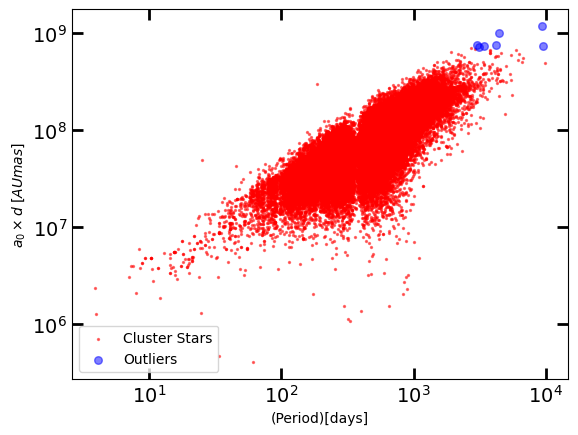

In [6]:

# Plot period vs ad_in_au
f_lim = 7e8
mask = a0_df['ad_in_au'] < f_lim

fig,ax = plt.subplots()

ax.scatter(a0_df[mask]['period'], 
           a0_df[mask]['ad_in_au'],
           s=2,c='r',alpha=0.5,
           label='Cluster Stars')

ax.scatter(a0_df[~mask]['period'], 
           a0_df[~mask]['ad_in_au'],
           s=30,c='b',alpha=0.5,
           label='Outliers')
           
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'(Period)[days]')
ax.set_ylabel(r'$a_0\times d$ [$AUmas$]')
ax.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax.tick_params(axis='x', which='minor', length=4, width=2, direction='in') 
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(loc='lower left')

# Save the plot
plt.savefig('period_vs_ad_in_au.png', dpi=300)

plt.show()

/tmp/ipykernel_77338/2638280024.py:16: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig('mass_function_histogram.png', dpi=300)


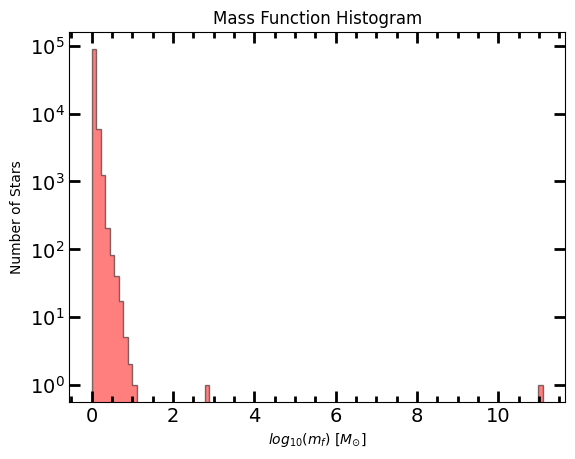

In [7]:
# Plot a histogram of the mass function m_f
fig,ax = plt.subplots()

ax.hist(a0_df['m_f'], bins=100, color='r', alpha=0.5, histtype='stepfilled', edgecolor='k')
ax.set_xlabel(r'$log_{10}(m_f)$ [$M_{\odot}$]')
ax.set_ylabel('Number of Stars')
ax.set_yscale('log')

ax.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax.tick_params(axis='x', which='minor', length=4, width=2, direction='in')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title('Mass Function Histogram')

# Save the plot
plt.savefig('mass_function_histogram.png', dpi=300)

plt.show()

/tmp/ipykernel_77338/1043653252.py:16: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig('dark_mass_histogram.png', dpi=300)


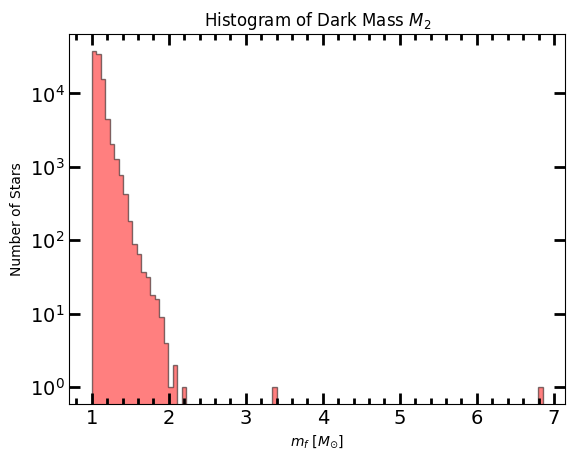

In [8]:
# Plot a histogram of the mass function m_f
fig,ax = plt.subplots()

ax.hist((a0_df['m2_1']), bins=100, color='r', alpha=0.5, histtype='stepfilled', edgecolor='k')
ax.set_xlabel(r'$m_f$ [$M_{\odot}$]')
ax.set_ylabel('Number of Stars')
ax.set_yscale('log')

ax.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax.tick_params(axis='x', which='minor', length=4, width=2, direction='in')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title(r'Histogram of Dark Mass $M_2$')

# Save the plot
plt.savefig('dark_mass_histogram.png', dpi=300)

plt.show()

/tmp/ipykernel_77338/2177553367.py:18: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig('dark_mass_histogram_zoom.png', dpi=300)


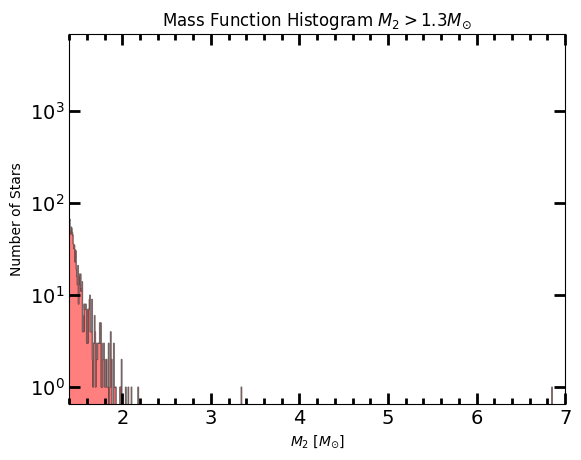

In [9]:
# Plot a histogram of the mass function m_f
fig,ax = plt.subplots()

ax.hist((a0_df['m2_1']), bins=1000, color='r', alpha=0.5, histtype='stepfilled', edgecolor='k')
ax.set_xlabel(r'$M_2$ [$M_{\odot}$]')
ax.set_ylabel('Number of Stars')
ax.set_yscale('log')

ax.set_xlim(1.4, 7)

ax.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) #Inward pointing ticks are so much easier to see where the *data* are.  Also, let's have ticks on all sides.
ax.tick_params(axis='x', which='minor', length=4, width=2, direction='in')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title(r'Mass Function Histogram $M_2>1.3M_{\odot}$')

# Save the plot
plt.savefig('dark_mass_histogram_zoom.png', dpi=300)

plt.show()

In [10]:
black_hole_candidates = a0_df[a0_df['m2_1'] > 1.4]

In [11]:
black_hole_candidates

,solution_id,source_id,nss_solution_type,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,...,BP-RB_corr,goodness_of_fit,u_obs,v_obs,a0_obs,m_f,d_in_au,ad_in_au,m2_1,parallax_SNR
30,4338096422163308546,5707072523392360192,Orbital,127.994850,0.061273,-19.111032,0.027969,2.041953,0.036152,-9.695773,...,0.968801,-1.551650,1.054749,0.321802,1.434994,0.267424,1.010135e+08,1.449538e+08,1.414016,56.482457
46,4338096422163308546,5707611627688403328,Orbital,125.295466,0.033988,-19.337538,0.033502,0.964644,0.016047,6.622592,...,1.028681,3.855769,0.727098,-0.695921,0.968365,0.322241,2.138248e+08,2.070606e+08,1.482112,60.114066
47,4338096422163308546,5707611627688403328,Orbital,125.295466,0.033988,-19.337538,0.033502,0.964644,0.016047,6.622592,...,1.028681,-0.875859,0.727098,-0.695921,0.968365,0.322241,2.138248e+08,2.070606e+08,1.482112,60.114066
87,4338096422163308546,1850112108272596352,Orbital,322.981776,0.042857,30.347418,0.036935,1.225969,0.021223,-9.807344,...,0.821526,2.765855,0.606806,0.573847,0.896699,0.276575,1.682463e+08,1.508662e+08,1.425638,57.767039
132,4338096422163308546,1851513126607796480,Orbital,317.686754,0.035965,29.496283,0.037841,0.845012,0.014627,8.917771,...,1.040260,1.799407,0.789811,0.767733,0.987548,0.307463,2.440970e+08,2.410574e+08,1.464103,57.771620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136348,4338096422163308546,1845070057187474304,AstroSpectroSB1,315.643452,0.144397,26.716768,0.072096,1.200616,0.015695,-10.361383,...,1.275588,3.615071,4.045563,4.045447,2.018979,0.263745,1.717992e+08,3.468591e+08,1.409312,76.496699
136373,4338096422163308546,542713240052080768,AstroSpectroSB1,51.825705,0.096009,69.972364,0.153497,2.206814,0.014045,15.456519,...,1.226988,1.567228,19.269469,-18.205476,5.058061,0.332398,9.346725e+07,4.727631e+08,1.494351,157.126299
136475,4338096422163308546,544894602402169984,AstroSpectroSB1,52.926268,0.045635,74.767875,0.057360,3.455183,0.024468,-18.262415,...,1.083419,3.877741,10.665676,1.535828,4.606538,0.359966,5.969721e+07,2.749975e+08,1.527028,141.209473
136666,4338096422163308546,5972309427049469824,Orbital,258.748788,0.056106,-39.113663,0.101285,1.595522,0.024346,0.309725,...,NaN,1.703637,3.495377,-3.346872,2.122122,0.303402,1.292773e+08,2.743422e+08,1.459111,65.534262


In [12]:
# Get this star: source_id == 4373465352415301632
Gaia_BH1 = black_hole_candidates[black_hole_candidates['source_id']
                                  == 4373465352415301632]
Gaia_BH1.iloc[0]

solution_id                4338096422163308546
source_id                  4373465352415301632
nss_solution_type                      Orbital
ra                                  262.171208
ra_error                              0.495897
dec                                  -0.581092
dec_error                             0.150922
parallax                              2.095452
parallax_error                        0.017456
pmra                                  -7.70205
pmra_error                            0.020407
pmdec                               -25.850421
pmdec_error                           0.026994
a_thiele_innes                       -0.262289
a_thiele_innes_error                  0.169845
b_thiele_innes                        2.929116
b_thiele_innes_error                  0.175218
f_thiele_innes                        1.524807
f_thiele_innes_error                  0.153876
g_thiele_innes                        0.534369
g_thiele_innes_error                  0.546531
c_thiele_inne

In [13]:
separation = 2*Gaia_BH1['a0_obs'].values[0]
print('Separation:',separation,'mas')

period = Gaia_BH1['period'].values[0]
print('Period:',period,'days')

mass = Gaia_BH1['m2_1'].values[0]
mass_str = f'Mass: {mass:.2f} Msun'
print(mass_str)

Separation: 5.955032949187323 mas
Period: 185.7656578920495 days
Mass: 6.85 Msun
